# Comparing machine learning models in scikit-learn


## Agenda

- How do I choose **which model to use** for my supervised learning task?
- How do I choose the **best tuning parameters** for that model?
- How do I estimate the **likely performance of my model** on out-of-sample data?

## Review

- Classification task: Predicting the species of an unknown iris
- Used three classification models: KNN (K=1), KNN (K=5), logistic regression
- Need a way to choose between the models. Which model performed the best among them.

**Solution:** Model evaluation procedures
- **MOdel Evaluation** process allows us to estimates how well a given model is likely to perfom on our sample data.

- There are many *Model evaluation* procedure. But we'll see only two procedure here.

## Evaluation procedure #1: Train and test on the entire dataset

1. Train the model on the **entire dataset**.
2. Test the model on the **same dataset** by checking how well they performed on that same data, and evaluate how well we did by comparing the **predicted** response values with the **true** response values.

In [1]:
# read in the iris data
from sklearn.datasets import load_iris
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

### Logistic regression

In [2]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with training data
logreg.fit(X, y)

# predict the response values for the observations in X
logreg.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
# store the predicted response values
y_pred = logreg.predict(X)

# check how many predictions were generated. in output we get 150 prediction, which is 1 prediction for each 
# observation
len(y_pred)

150

Classification accuracy: a numerical way to check how well our model performed. Most obvious choice would be classification accuracy.

- Classification accuracy is the **Proportion** of correct predictions.This is known as evALUATION MATRIC.
- Common **evaluation metric** for classification problems
- there are many **evaluation metric** model available

In [4]:
# import metrics module from sklearn
# compute classification accuracy for the logistic regression model
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred))

0.96


- Known as **training accuracy** because you train and test the model on the same data

### KNN (K=5)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.966666666667


### KNN (K=1)

In [6]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

1.0


KNN (K=1) performed better than KNN (K=5) and gave 100% prediction accuracy. So KNN (K=1) is the best model to use with this data.

- KNN works by looking K observation in the training data with the nearest feature value and makes prediction. It tallies the actual response values of those nearest observation and whichever response value is most popular, is used as predicted response value for the unknown observations. 
  -- This is the reason, why KNN (K=1) would always has 100% training accuracy.
    -- To make prediction for any observation in the training set, **KNN** would search one nearest observation in the training set and would find that exact same observation.
    
    #### So KNN (K=1) is not the best model to choose to test training accuracy.

### Problems with training and testing on the same data

- Goal is to estimate likely performance of a model on **out-of-sample data**
- But, maximizing training accuracy rewards **overly complex models** that won't necessarily generalize to future cases.
  - Model with high training accuracy may not actually do well when making prediction on **out-of-sample data**.
  - Creating Unnecessarily complex models are known as overfitting.
    - this complex model learns the noise in the data rather than the signal.
         - In the case of KNN with very low value of k(e.g. 1) creates very high complexity model bcoz it follows the noise in the data.
- Unnecessarily complex models **overfit** the training data

![Overfitting](https://upload.wikimedia.org/wikipedia/commons/1/19/Overfitting.svg)

Each point in above diagram represents an observation, x-y location represents its feature values and color represents its response class.

Black line is decision boundry. It is a good boundry to classify future observations as compared to blue spot.

Blue line as decision boundry, is overfitting the data. It does perfect job of classifying training data set. But it probably doesn't do well as black line on classifying **out-of-sample-data** 

Green line has learned noise in the data whereas black line learned the signal.

An overfit model, like the one pictured above, has learned the **noise** in the data (the green line) rather than the **signal** (the black line). To avoid overfitting, we'll use a different evaluation procedure that splits our existing data into **training and testing sets**:

Unfortunately, choosing a model based on training accuracy can lead to overfitting:

##### Training and Testing on same set of data is not an optimal model of evaluation procedure.

*Image Credit: [Overfitting](http://commons.wikimedia.org/wiki/File:Overfitting.svg#/media/File:Overfitting.svg) by Chabacano. Licensed under GFDL via Wikimedia Commons.*

## Evaluation procedure #2: Train/test split

1. Split the dataset into two pieces: a **training set** and a **testing set**.
2. Train the model on the **training set**.
3. Test the model on the **testing set**, and evaluate how well we did.

In [7]:
# print the shapes of X and y
# X is feature matrix of size 150(row)X4(column)
# y is response vector containing 150 response value
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [8]:
# STEP 1: split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)


test_size paramenter in **tran_test_split()** tells about the ration between proportion of observation assigned to testing set. Here it is 40% of observation assigned to testing set and rest 60% was assigned to training set.

Generally 20-40% of data is used for testing purpose.

- How observation is assigned to X_train,y_train, X_test and y_test.
    - Observation is assigned randomly.
        - Running this observation five times on same set of data, it will split the data in 5 different ways.
        - To avoid this random assignment, use optional parameter **random_state** and give it integer value. It will split the same dataset in exact same way everytime.

![Train/test split](http://5047-presscdn.pagely.netdna-cdn.com/wp-content/uploads/2015/05/05_train_test_split-e1431626237154.png)

Five observation with two feature values and response value.
- response value is numeric in diagram, it means that this is a regression problem.
X matrix is 5rowX2column.
y vector is 5 values.

X is divided into X_test(2X2) and X_train(3X2) and y in to y_train(3X1) and y_test(2X1).

- Training Data:
   - Feature Matrix : X_train
   - Response Matrix: y_train
   
We will make prediction on X_test and compare these prediction with response value in y_test. This comparison will give **testing-accuracy** of the model.

that allows us to calculate the testing accuracy, which better estimates the likely performance of our model on future data. As well, we can locate the optimal tuning parameters for our model by examining its testing accuracy at different levels of model complexity.

What did this accomplish?

- Model can be trained and tested on **different data**
- Response values are known for the testing set, and thus **predictions can be evaluated**
- **Testing accuracy** is a better estimate than training accuracy of out-of-sample performance

In [9]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


In [11]:
# print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(90,)
(60,)


In [12]:
# STEP 2: train the model on the training set
logreg = LogisticRegression()  # instantiting the LogisticRegression()
logreg.fit(X_train, y_train) # fitting it with X_train and y_train

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
# STEP 3: make predictions for the observation on the testing set by passing X_test to predict() and store it in y_pred
y_pred = logreg.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print(metrics.accuracy_score(y_test, y_pred))

0.95


Repeat for KNN with K=5:

In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.966666666667


Repeat for KNN with K=1:

In [16]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.95


### Can we locate an even better value for K?

In [17]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

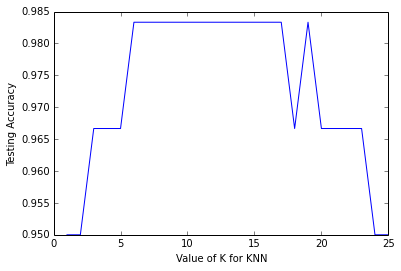

In [24]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

- **Training accuracy** rises as model complexity increases
- **Testing accuracy** penalizes models that are too complex or as well as model that are not complex enough
- For KNN models, complexity is determined by the **value of K** (lower value = more complex)

- Above behaviour is good for small datasets, but this behaviour(testing accuracy) may not remain for large datasets.

 Plotting **Testing Accuracy** ***vs*** __model-complexity__ is a very useful way to tune any parameters that relates to __model-complexity__

## Making predictions on out-of-sample data


Once you have chosen you model and its optimal parameter (e.g. best value of K for KNN), **retrain** your model on all the available *training-data* before making any new prediction, otherwise you will be throwing away your valuable training data.

In [18]:
# instantiate the model with the best known parameters 
# 11 is chosen for K in KNN bcoz it is in the middle of K range with highest testing accuracy. It is the best
# parameter.
knn = KNeighborsClassifier(n_neighbors=11)

# train the model with X and y (not X_train and y_train)
knn.fit(X, y)

# make a prediction for an out-of-sample observation
knn.predict([[3, 5, 4, 2]])

array([1])

## Downsides of train/test split?

- Provides a **high-variance estimate** of out-of-sample accuracy
    - It means that it can change a lot depending upon which observation happen to be in training set vs testing set.
    - This limitation can be overcome by using **K-fold cross-validation** by repeating the train/test split process multiple times in a systematic way and averaging the results
- **K-fold cross-validation** overcomes this limitation
- But, train/test split is still useful because of its **flexibility and speed**

To understand this week's material at a deeper level, I strongly recommend that you review the two resources below on the bias-variance tradeoff. It's a critical topic that shows up throughout machine learning, and will help you to gain an intuitive sense for why models behave the way they do.

## Resources

- Quora: [What is an intuitive explanation of overfitting?](http://www.quora.com/What-is-an-intuitive-explanation-of-overfitting/answer/Jessica-Su)
- Video: [Estimating prediction error](https://www.youtube.com/watch?v=_2ij6eaaSl0&t=2m34s) (12 minutes, starting at 2:34) by Hastie and Tibshirani
- [Understanding the Bias-Variance Tradeoff](http://scott.fortmann-roe.com/docs/BiasVariance.html)
    - [Guiding questions](https://github.com/justmarkham/DAT8/blob/master/homework/09_bias_variance.md) when reading this article
- Video: [Visualizing bias and variance](http://work.caltech.edu/library/081.html) (15 minutes) by Abu-Mostafa